### Have Heart Disease (yes or no)?

See below all the features:
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Loading The dataset from Kaggle
heart = pd.read_csv("/content/drive/My Drive/Colab Notebooks/heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# The dataset has 303 rows and 14 columns
heart.shape

(303, 14)

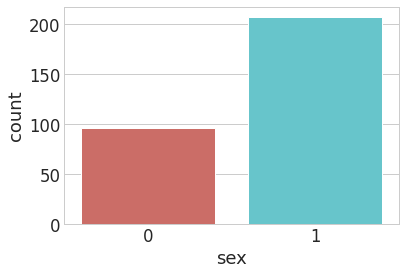

In [33]:
# Plotting by Age
plt.style.use("seaborn-whitegrid")
heart.sex.value_counts()
sns.countplot(x="sex", data=heart, palette="hls");
sns.set(font_scale=1.5)

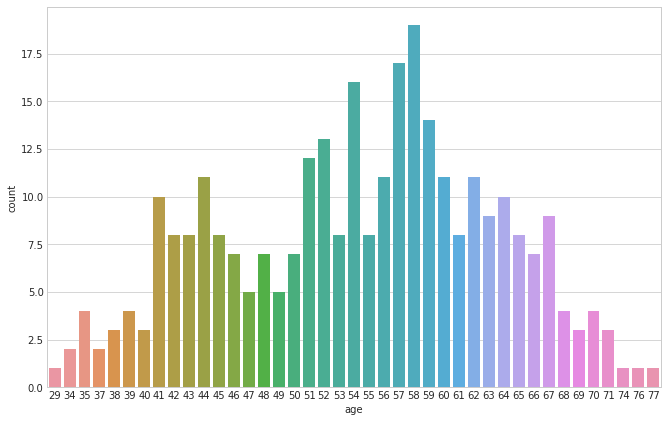

In [6]:
# Countplot by age
heart.age.value_counts()
plt.figure(figsize=(11, 7))
sns.countplot(x="age", data=heart);
sns.set(font_scale=1.5)

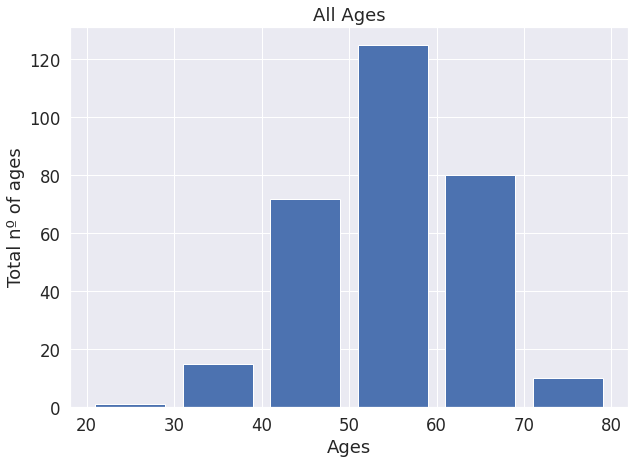

In [7]:
# Histogram with personalized bins
ages = heart["age"]
bins = [20, 30, 40, 50, 60, 70, 80]
plt.figure(figsize=(10, 7))
plt.hist(ages, bins, histtype="bar", rwidth=0.8);
plt.xlabel("Ages")
plt.ylabel("Total nº of ages")
plt.title("All Ages");

In [8]:
# Creating a variable with only ages above 50 years
over_50 = heart[heart["age"] > 50]
len(over_50)

208

In [9]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


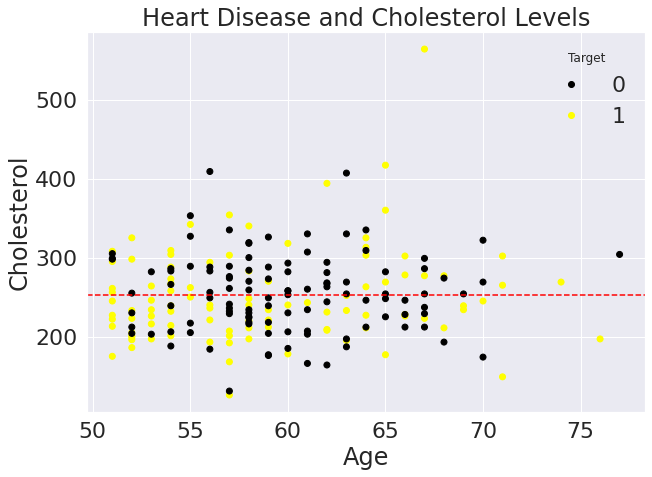

In [11]:
#Scatter plot showing the relation between cholesterol and age related to the target
fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                     cmap="gnuplot");
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.legend(*scatter.legend_elements(), title="Target");
ax.axhline(over_50["chol"].mean(),
           linestyle="--", color="red");
sns.set(font_scale=2)

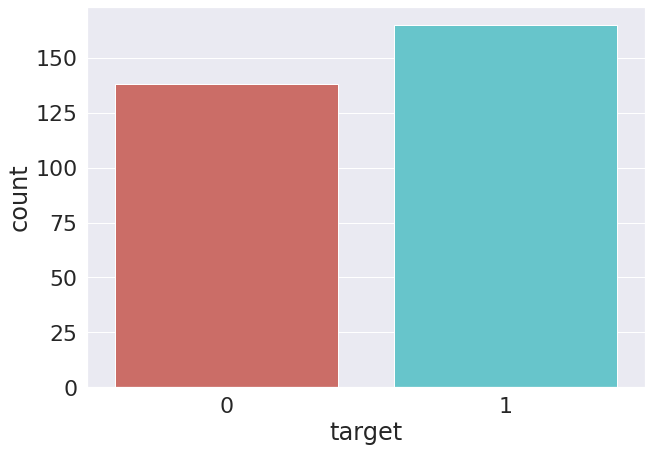

In [12]:
# Another countplot by target (total number of "no" vs "yes")
heart.target.value_counts()
plt.figure(figsize=(10, 7))
sns.countplot(x="target", data=heart, palette="hls");

In [13]:
# Getting the X and Y variables assigned
X = heart.drop(["target"], axis=1)
Y = heart["target"]

In [14]:
# Training and testing the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=123)

In [15]:
# Logistic Regression model (for binary classification)
# Intatiating the model
log_reg = LogisticRegression(max_iter=400)
log_reg.fit(X_train, Y_train);

In [16]:
y_predict = log_reg.predict(X_test)

In [17]:
y_predict

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [28]:
# Overall score
log_scor = log_reg.score(X_test, Y_test)
print(f"Score: {(log_scor) *100:.2f}%")

Score: 85.25%


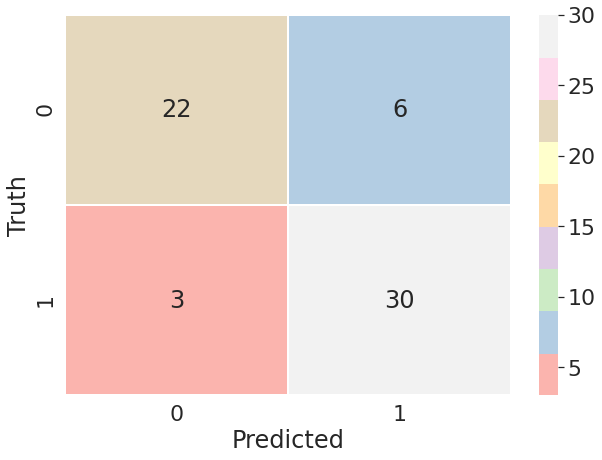

In [19]:
# Confusion Matrix for model evaluation
cm = confusion_matrix(Y_test, y_predict)

plt.figure(figsize=(10, 7)), 
sns.heatmap(cm, annot=True, linewidth=1, cmap="Pastel1")
sns.set(font_scale=3)
sns.set(font_scale=2)
plt.xlabel("Predicted")
plt.ylabel("Truth");

In [20]:
# Confusion Matrix (evaluation metrics)

print("Accuracy:", metrics.accuracy_score(Y_test, y_predict))
print("Precision:", metrics.precision_score(Y_test, y_predict))
print("Recall:", metrics.recall_score(Y_test, y_predict))

Accuracy: 0.8524590163934426
Precision: 0.8333333333333334
Recall: 0.9090909090909091


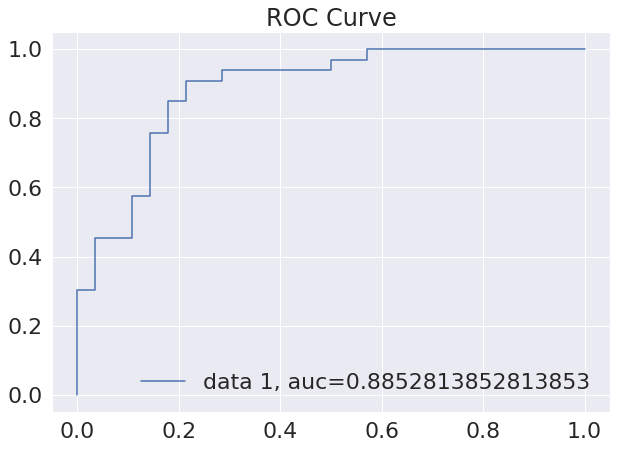

In [21]:
# ROC Curve
y_p_proba = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_p_proba)
auc = metrics.roc_auc_score(Y_test, y_p_proba)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.title("ROC Curve")
plt.legend(loc=4);
sns.set(font_scale=1.5)


In [22]:
# Calculate fpr, tpr and threshold
# AUC stands for Area Under the Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_probs = log_reg.predict_proba(X_test)[:,1]

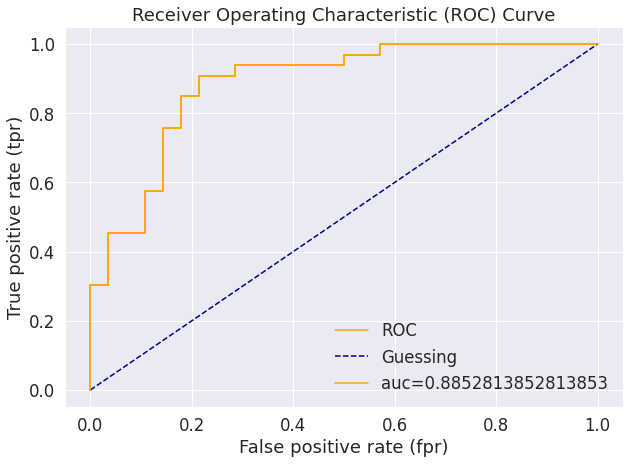

In [23]:
# Plotting the second ROC Curve (and its AUC)
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
auc = roc_auc_score(Y_test, y_probs)

def plot_roc_curve(fpr, tpr):
  """
  Plots a ROC curve given the false positive rate (fpr) and
  true positive rate (tpr) of a model.
  """
  plt.figure(figsize=(10, 7))
  plt.plot(fpr, tpr, color="orange", label="ROC")
  plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
  plt.plot(fpr, tpr, color="orange", label="auc="+str(auc))
  plt.xlabel("False positive rate (fpr)")
  plt.ylabel("True positive rate (tpr)")
  plt.title("Receiver Operating Characteristic (ROC) Curve")
  sns.set(font_scale=1.5)
  plt.legend()
  plt.show();

plot_roc_curve(fpr, tpr)

In [24]:
# Let's perform a classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [27]:
# Now let's check the MAE (Mean Absolute Error)
# MAE is the average of the absolute differences between predictions and actual values.
# It gives an idea of how wrong the model prediction is
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, y_predict)
mae

0.14754098360655737

In [32]:
# Checking the MSE (Mean Squared Error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, y_predict)
mse

0.14754098360655737